# Pointilism usage examples

### Explanation
The module `pointillism` contains classes to build pointillized pictures with colors taken from a source image(s). The base class is `pointillize` and can load directories or single images, and includes the primary methods:
* `plotRecPoints()` plots rectangular arrays of circles of fixed radius
* `plotRandomPoints()` plots random circles of random radius
* `plotRandomPointsComplexity()` plots random circles with radius based on complexity of source image in that area

In addition, the subclass `pointillizeStack` contains methods for building a workflow of image manipulations and then saving gif animations of either the construction of the image or of the final result constructed repeatedly to produce a kind of fluid final picture. Currently only implemented to work on single images. Its subclass `pointillizePile` however is implemented to operate in serial on a large list of images and supports saving gifs in batches as well. 

In the future, support will be provided for loading movie files and saving out pointillized versions of them

### Samples
Some images and gifs I've produced can be found here: https://photos.app.goo.gl/SAQ1DMLrkVxoyjGB3

## Import class definitions

In [1]:
from pointillism import pointillize, pointillizeStack, pointillizePile
%run pointillism.py

# Usage examples

## 1) Read image, run routines to pointillize, and save result

images/IMG_0116.jpg


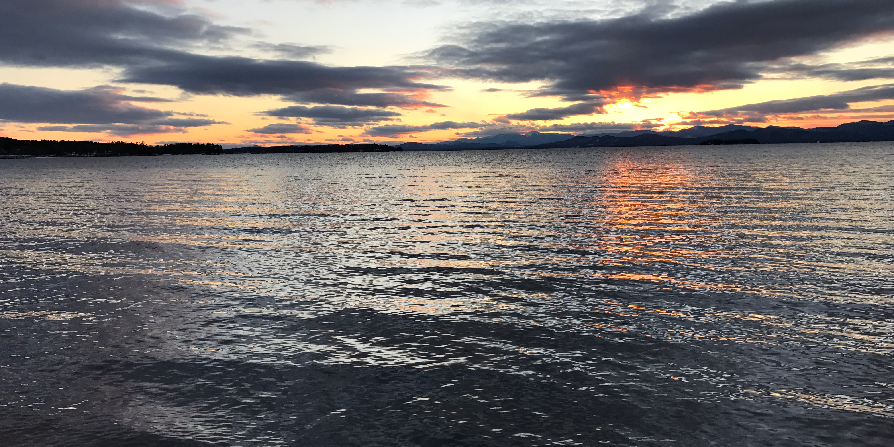

In [121]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_0116.jpg', debug = True)

# Crop
point.crop_Y([1000,500], False)

# Display original
point.display(original=True)

In [122]:
# Plot rectangular grid of overlapping circles to fill canvas
point.plotRecPoints(n=40, multiplier=1, fill=False)

# Plot many random points with size proportional to area complexity
point.plotRandomPointsComplexity(n=2e4, constant=0.01, power=1.3)  

plotRecPoints: done...took 0.69 sec
plotRandomPointsComplexity: done...took 19.28 sec


images/IMG_0116.jpg


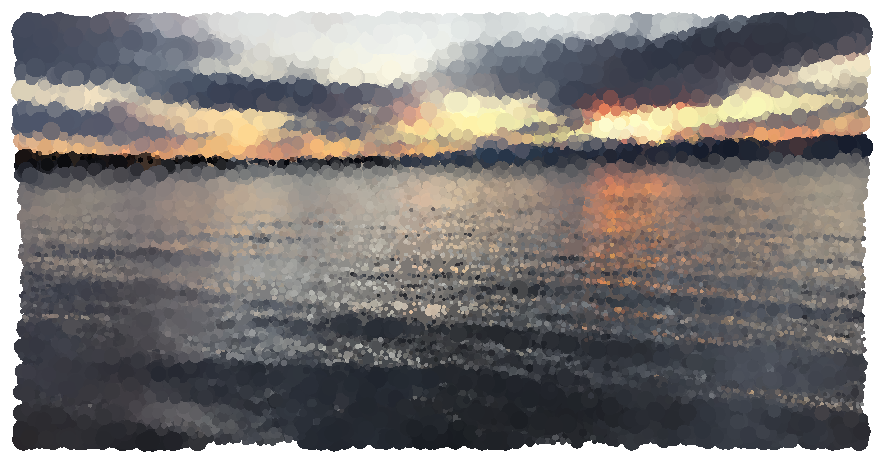

In [123]:
# Display and save
point.display()
point.save_out(location = 'images_out', suffix = 'basic test')

## 2) Build image stacks using `pointillizeStack` and save as gif of intermediate images

In [133]:
# Create instance
point = pointillizeStack(location='images/IMG_0116.jpg', debug = True, border = 0)

# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.crop_Y,[[1920,1080], True],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e3,0.01,1.3],10)

# Build image stacks
point.build_stacks(n=1, save_steps=True)

crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done


In [134]:
# Save
point.save_gif('gifs/animated_stacking.gif', step_duration=0.5)

In [135]:
# Display
from IPython.display import HTML
HTML('<img src="gifs/animated_stacking.gif">')

## 3) Build image stacks using `pointillizeStack` and save as gif of final images

In [136]:
# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.crop_Y,[[1920,1080], True],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1.3],1)

# Build image stacks
point.build_stacks(n=10, save_steps=False)

Building image:  1 2 3 4 5 6 7 8 9 10 done


In [137]:
# Save
point.save_gif('gifs/animated_stacking_loop.gif', step_duration=0.1)

In [138]:
# Display
HTML('<img src="gifs/animated_stacking_loop.gif">')

## 4) Build image stacks using `pointillizeStack` and save as gif of multiplied images

In [139]:
point = pointillizeStack(location='images/IMG_0116.jpg', border = 0, debug=True, queue=True)
point.crop_Y([1920,1080], resize=True)

In [140]:
point.plotRecPoints(n=40, multiplier=1, fill=False)
point.plotRandomPointsComplexity(n=5e4, constant=0.01, power=1.3)

plotRecPoints: done...took 0.43 sec
plotRandomPointsComplexity: done...took 48.34 sec


In [141]:
multipliers = [5,4.5,4,3.5,3,2.6,2.3,2,1.75,1.5,1.25,1.1,1,1]
multipliers += multipliers[::-1]

In [142]:
point.build_multipliers(multipliers)

Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 done


In [143]:
point.save_gif('gifs/pointqueue.gif',0.1)

In [144]:
HTML('<img src="gifs/pointqueue.gif">')

## 5. Bulk image processing with `pointillizePile`

In [16]:
# Create instance on directory
point = pointillizePile(location='images/', debug = True, border = 0)

### Images

In [17]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[960,540], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1.3],1)

# Run and save
point.run_pile_images(location = 'images_out', suffix = 'no border')

Batch processing image: 1 2 3 4 done


### Loop GIFs

In [18]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1.3],1)

# Run and save (gifs) in loop mode
point.run_pile_gifs(location = 'images_out/gifs', n=10, save_steps = False, step_duration = 0.1, suffix = 'loop')

1 Building image:  1 2 3 4 5 6 7 8 9 10 done
2 Building image:  1 2 3 4 5 6 7 8 9 10 done
3 Building image:  1 2 3 4 5 6 7 8 9 10 done
4 Building image:  1 2 3 4 5 6 7 8 9 10 done


### Assembly gifs

In [19]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e3,0.01,1.3],10)

# Run and save (gifs) in assembly mode
point.run_pile_gifs(location = 'images_out/gifs', n=1, save_steps = True, step_duration = 0.5, suffix = 'assembly')

1 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done
2 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done
3 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done
4 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done


### Multiplier gifs

In [2]:
# Create instance on directory
point = pointillizePile(location='images/', debug=True, border=0, queue=True)

In [4]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1.3],1)

# Run and save (gifs) in multiplier mode
multipliers = [5,4.5,4,3.5,3,2.6,2.3,2,1.75,1.5,1.25,1.1,1,1]
multipliers += multipliers[::-1]
point.run_pile_multipliers(location = 'images_out/gifs', multipliers = multipliers,
                           step_duration = 0.1, suffix = 'muliplier')

1 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 done
2 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 done
3 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 done
4 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 done


<center> <h1>-------------------- Working section below  ---------------------</h1> </center>

# Notes and To Do's
* Look into reading in movies, and saving gifs as movies

# Fixing issues from v1

* Points too small when complexity is high, plotRec is not number of points (done)
* Not enough detail, too slow. Increasing point count and power, resizing array to 20%

In [61]:
%run pointillism.py
point = pointillizePile(location='orientation_test/', debug=True)

In [62]:
# Crop and build queue
point.new_queue()
#point.add_to_queue(point.crop_Y,[[960,540], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e3,0.01,1.3],1)
#point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1.3],1)

# Run and save
point.run_pile_images(location = 'orientation_test_out/', suffix = 'orientation test')

Batch processing image: 1 2 3 4 5 6 7 8 9 10 done


In [64]:
#point.display(original=True)

# Better size agnostic min radius

In [112]:
%run pointillism.py

plotRecPoints: done...took 0.75 sec
plotRandomPointsComplexity: done...took 18.24 sec
media/864_GrandTeton2_JamesKaiser.jpg


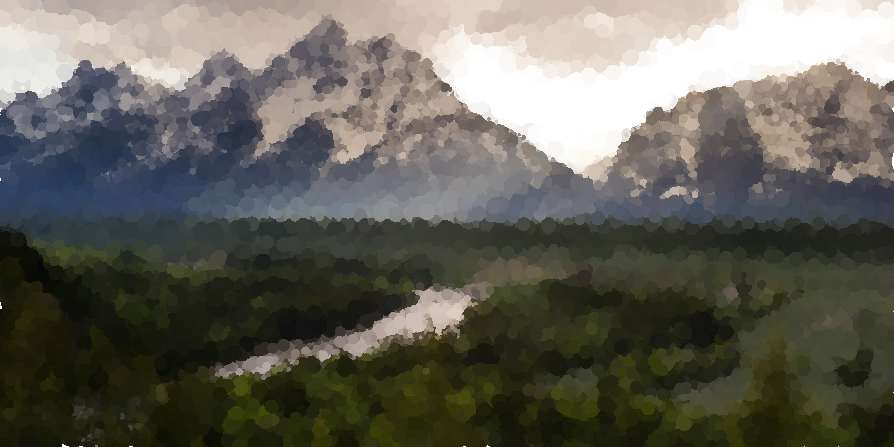

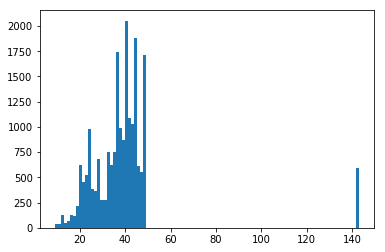

In [113]:
point = pointillize(location='media/864_GrandTeton2_JamesKaiser.jpg',
                    debug=True, reduce_factor=2, queue=True, border=0)

point.crop_Y([2,1], resize=False)
point.plotRecPoints(n=40, multiplier=1, fill=False)
point.plotRandomPointsComplexity(n=2e4, constant=0.0075, power=1.3)
point._plotQueue(1)
point.display()

from matplotlib import pyplot as plt
r = [point['r'] for point in point.pointQueue]
plt.hist(r, bins=100)
plt.show()

In [114]:
point.params['reduce_factor']

2

plotRecPoints: done...took 0.28 sec
plotRandomPointsComplexity: done...took 41.91 sec
media/864_GrandTeton2_JamesKaiser.jpg


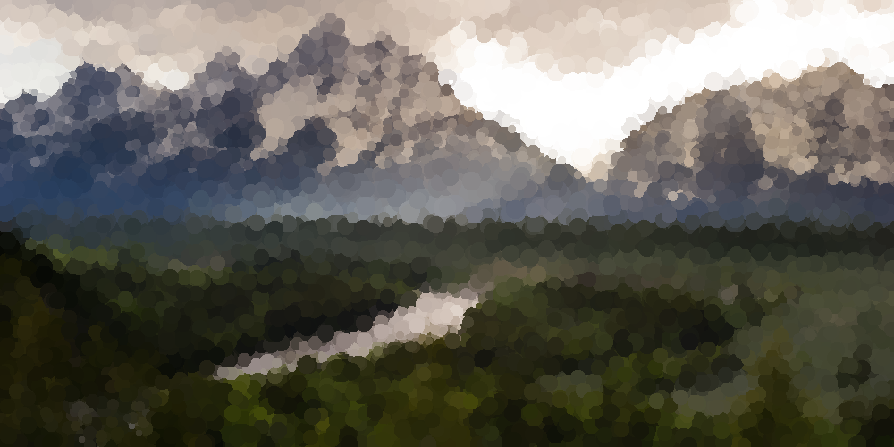

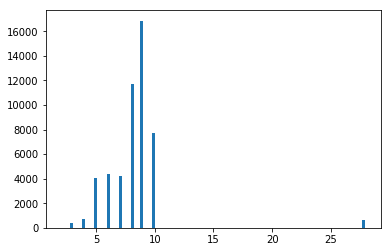

In [115]:
point = pointillize(location='media/864_GrandTeton2_JamesKaiser.jpg',
                    debug=True, reduce_factor=2, queue=True, border=0)

point.crop_Y([1000,500], resize=True)
point.plotRecPoints(n=40,multiplier=1, fill=False)
point.plotRandomPointsComplexity(n=5e4, constant=0.0075, power=1.3)

point._plotQueue(1)
point.display()
r = [point['r'] for point in point.pointQueue]
plt.hist(r, bins=100)
plt.show()


In [116]:
point.params['reduce_factor']

1.118033988749895

plotRecPoints: done...took 0.37 sec
plotRandomPointsComplexity: done...took 40.72 sec
media/864_GrandTeton2_JamesKaiser.jpg


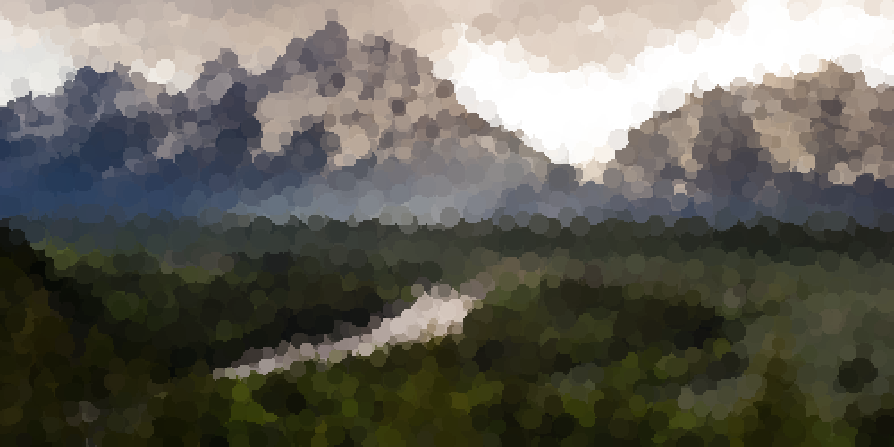

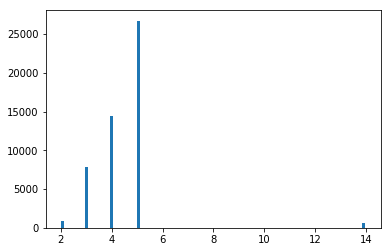

In [119]:
point = pointillize(location='media/864_GrandTeton2_JamesKaiser.jpg',
                    debug=True, reduce_factor=2, queue=True, border=0)

point.crop_Y([500,250], resize=True)
point.plotRecPoints(n=40,multiplier=1, fill=False)
point.plotRandomPointsComplexity(n=5e4, constant=0.0075, power=1.3)

point._plotQueue(1)
point.display()
r = [point['r'] for point in point.pointQueue]
plt.hist(r, bins=100)
plt.show()


In [120]:
point.params['reduce_factor']

1

# Adding scaling function

In [ ]:
point = pointillizeStack(location='images/IMG_0116.jpg', border = 0, debug=True, queue=True)
point.crop_Y([1000,500], resize=False)

In [ ]:
point.plotRecPoints(n=40, multiplier=1, fill=False)
point.plotRandomPointsComplexity(n=5e4, constant=0.01, power=1.3)

In [ ]:
r = [point['r'] for point in point.pointQueue]

In [ ]:
from matplotlib import pyplot as plt
plt.hist(r, bins=100)
plt.show()

# Making gifs work in Django

In [11]:
point = pointillizeStack(location='images/IMG_0116.jpg', border = 0, debug=True, queue=True)
point.crop_Y([1920,1080], resize=True)

In [12]:
point.plotRecPoints(n=40, multiplier=1, fill=False)
point.plotRandomPointsComplexity(n=5e4, constant=0.01, power=1.3)

plotRecPoints: done...took 0.32 sec
plotRandomPointsComplexity: done...took 38.63 sec


In [13]:
multipliers = [5,4.5,4,3.5,3,2.6,2.3,2,1.75,1.5,1.25,1.1,1,1]
multipliers += multipliers[::-1]

In [14]:
point.build_multipliers(multipliers)

Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 done


In [27]:
arrays = []
for out in point.image_stack:
    arrays.append(np.array(out))
gif_stream = io.BytesIO()
imageio.mimwrite(gif_stream, arrays, format='gif', duration=.1)

# Check resize function

In [31]:
%run pointillism.py
point = pointillizeStack(location='images/IMG_0116.jpg')

In [36]:
point.resize(0.1,500)

In [37]:
point.image.size

(400, 300)

# Fix rotation issue

In [8]:
%run pointillism.py

In [9]:
point = pointillize(location='images/IMG_0447.JPG', debug=True, reduce_factor=2)

images/IMG_0447.JPG


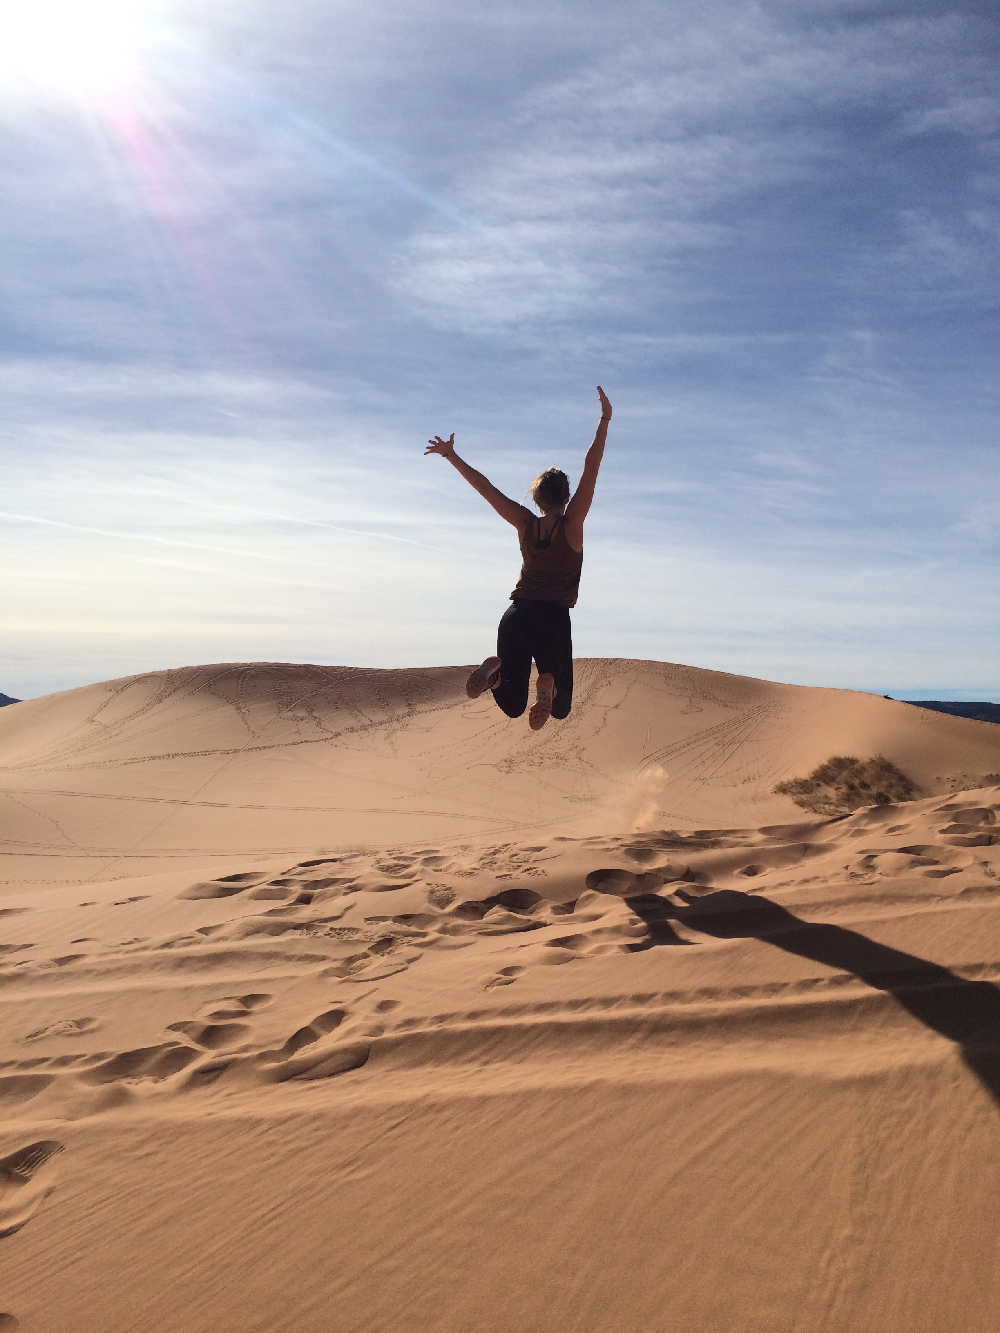

In [10]:
point.display(original=True)

# Reading and writing movies

In [2]:
import imageio
imageio.plugins.ffmpeg.download()

reader = imageio.get_reader('movies/Peninsula Flyby 20171010 leveled.mp4')
fps = reader.get_meta_data()['fps']

writer = imageio.get_writer('movies/Peninsula_full_out.mp4', fps=fps)


In [ ]:
start = time.time()
frames = len(reader)
for i, im in enumerate(reader):
    image = Image.fromarray(im)
    point=pointillize(image=image, border=0)
    point.plotRecPoints(40, multiplier=1, fill=True)
    point.plotRandomPointsComplexity(n=3e4, constant=0.0075, power=1.5)
    print('%d frames done of %d' %(i,frames))
    im_out = np.array(point.out)
    writer.append_data(im_out[:, :, :])
writer.close()
end = time.time()
print('Took %0.2f minutes' % ((end-start)/60))

0 frames done of 1439
1 frames done of 1439
2 frames done of 1439
3 frames done of 1439
4 frames done of 1439
5 frames done of 1439
6 frames done of 1439
7 frames done of 1439
8 frames done of 1439
9 frames done of 1439
10 frames done of 1439
11 frames done of 1439
12 frames done of 1439
13 frames done of 1439
14 frames done of 1439
15 frames done of 1439
16 frames done of 1439
17 frames done of 1439
18 frames done of 1439
19 frames done of 1439
20 frames done of 1439
21 frames done of 1439
22 frames done of 1439
23 frames done of 1439
24 frames done of 1439
25 frames done of 1439
26 frames done of 1439
27 frames done of 1439
28 frames done of 1439
29 frames done of 1439
30 frames done of 1439
31 frames done of 1439


# Documentation

In [76]:
# Help on method
help(pointillize.plotRandomPointsComplexity)

Help on function plotRandomPointsComplexity in module __main__:

plotRandomPointsComplexity(self, n, constant, power)
    plots random points over image, where constant is
    the portion of the width for the max size of the bubble,
    and power pushes the distribution towards smaller bubbles



In [ ]:
# Print attributes
display_point.print_attributes()

In [75]:
# Help on module
import pointillism
help(pointillism)

Help on module pointillism:

NAME
    pointillism - This module contains classes that help create pointillized images.

CLASSES
    builtins.object
        pointillize
            pointillizeStack
                pointillizePile
    
    class pointillize(builtins.object)
     |  Base class for pointillzation project
     |  
     |  Methods defined here:
     |  
     |  __init__(self, *args, **kwargs)
     |      Initiialize with image or directory
     |  
     |  crop_Y(self, aspect, resize)
     |      Crops and resizes in the height dimension to match aspect ratio
     |  
     |  display(self, **kwargs)
     |      Displays browser-size version of outputs, or original images
     |      if original=True
     |  
     |  plotRandomPointsComplexity(self, n, constant, power)
     |      plots random points over image, where constant is
     |      the portion of the width for the max size of the bubble,
     |      and power pushes the distribution towards smaller bubbles
     |  
